In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is 
    an item.
    '''

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

In [3]:
def draw_plot(dataframe, countryname):
    labelco2name = countryname + "  CO2 emission"
    labelpopulationname = countryname + "  population"
    filename = countryname + "-co2emission-population.jpg"
    figpath = os.path.abspath(os.path.join(os.getcwd(), "Image/CO2_Population", filename))
    sns.set(style="white")
    fig, ax=plt.subplots()
    fig.set_size_inches(15, 10)
    ax2=ax.twinx()
    sns.set(color_codes=True)
    sns.regplot(x="year", y="co2", data=dataframe, ax=ax, order=2, color="blue", marker="o", label=labelco2name)
    sns.regplot(x="year", y="population", data=dataframe, ax=ax2, order=2, color="orange", marker="x", label=labelpopulationname)
    fig.legend(loc=2, bbox_to_anchor=(0.12, 0.82), prop = {'size':20})


    ax.set_ylabel(labelco2name,fontsize=25)
    ax2.set_ylabel(labelpopulationname,fontsize=25)
    ax.set_xlabel('year', fontsize=25)
    plt.title(countryname,fontsize=60,y=0.93, pad=-14)
    plt.savefig(figpath, bbox_inches='tight')
    plt.show()

In [4]:
polulation_dataset = load_dataset("./Data/PopulationData/populations.csv")

In [5]:
polulation_dataset_list = list(polulation_dataset[5:])

In [6]:
polulation_dataset_list

[['Aruba',
  'ABW',
  'Population, total',
  'SP.POP.TOTL',
  '54208',
  '55434',
  '56234',
  '56699',
  '57029',
  '57357',
  '57702',
  '58044',
  '58377',
  '58734',
  '59070',
  '59442',
  '59849',
  '60236',
  '60527',
  '60653',
  '60586',
  '60366',
  '60102',
  '59972',
  '60097',
  '60561',
  '61341',
  '62213',
  '62826',
  '63024',
  '62645',
  '61838',
  '61072',
  '61033',
  '62152',
  '64623',
  '68240',
  '72495',
  '76705',
  '80324',
  '83211',
  '85450',
  '87280',
  '89009',
  '90866',
  '92892',
  '94992',
  '97016',
  '98744',
  '100028',
  '100830',
  '101226',
  '101362',
  '101452',
  '101665',
  '102050',
  '102565',
  '103165',
  '103776',
  '104339',
  '104865',
  '105361',
  '105846',
  '106310',
  '106766',
  ''],
 ['Africa Eastern and Southern',
  'AFE',
  'Population, total',
  'SP.POP.TOTL',
  '130836765',
  '134159786',
  '137614644',
  '141202036',
  '144920186',
  '148769974',
  '152752671',
  '156876454',
  '161156430',
  '165611760',
  '170257189',

In [7]:
df_polulation = pd.DataFrame(polulation_dataset_list, columns = polulation_dataset[4])

### World

In [8]:
df_world_population = df_polulation.loc[df_polulation['Country Name'] == 'World']
df_world_population = df_world_population.drop(df_world_population.columns[[0,1,2,3]], axis=1)
df_world_population.drop('2021', axis=1, inplace=True)

In [9]:
new_population_df = df_world_population.T.reset_index()
new_population_df.rename(columns = {'index':'year', 259:'population'}, inplace = True)
new_population_df.drop(new_population_df.tail(1).index,inplace=True)
new_population_df['population'] = new_population_df['population'].astype(float)

In [10]:
co2_emission_dataset = load_dataset("./Data/PopulationData/co2emissions.csv")

In [11]:
co2_emission_dataset_list = list(co2_emission_dataset[5:])

In [12]:
df_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_world_co2 = df_co2. loc[df_co2['Country Name'] == 'World']
df_world_co2 = df_world_co2.drop(df_world_co2.columns[[0,1,2,3,64,63]], axis=1)

In [13]:
new_co2_df = df_world_co2.T.reset_index()
new_co2_df.rename(columns = {'index':'year', 259:'co2'}, inplace = True)
new_co2_df.drop(new_co2_df.tail(1).index,inplace=True)
new_co2_df['co2'] = new_co2_df['co2'].astype(float)
new_co2_df['population'] = new_population_df['population']
new_co2_df['year'] = new_co2_df['year'].astype(float)

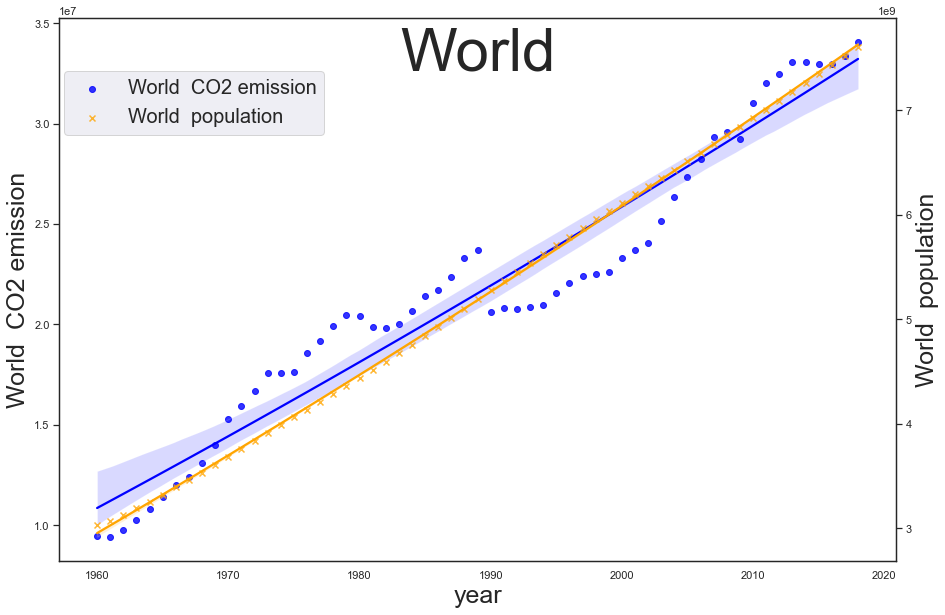

In [14]:
draw_plot(new_co2_df, 'World')

### USA

In [15]:
df_us_population = df_polulation.loc[df_polulation['Country Name'] == 'United States']
df_us_population = df_us_population.drop(df_us_population.columns[[0,1,2,3]], axis=1)
df_us_population.drop('2021', axis=1, inplace=True)
new_us_population_df = df_us_population.T.reset_index()
new_us_population_df.rename(columns = {'index':'year', 251:'population'}, inplace = True)
new_us_population_df.drop(new_us_population_df.tail(1).index,inplace=True)
new_us_population_df['population'] = new_us_population_df['population'].astype(float)

In [16]:
df_us_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_us_co2 = df_us_co2.loc[df_us_co2['Country Name'] == 'United States']
df_us_co2 = df_us_co2.drop(df_us_co2.columns[[0,1,2,3,64,63]], axis=1)

new_us_co2_df = df_us_co2.T.reset_index()
new_us_co2_df.rename(columns = {'index':'year', 251:'co2'}, inplace = True)
new_us_co2_df.drop(new_us_co2_df.tail(1).index,inplace=True)
new_us_co2_df['co2'] = new_us_co2_df['co2'].astype(float)

new_us_co2_df['population'] = new_us_population_df['population']
new_us_co2_df['year'] = new_us_co2_df['year'].astype(float)

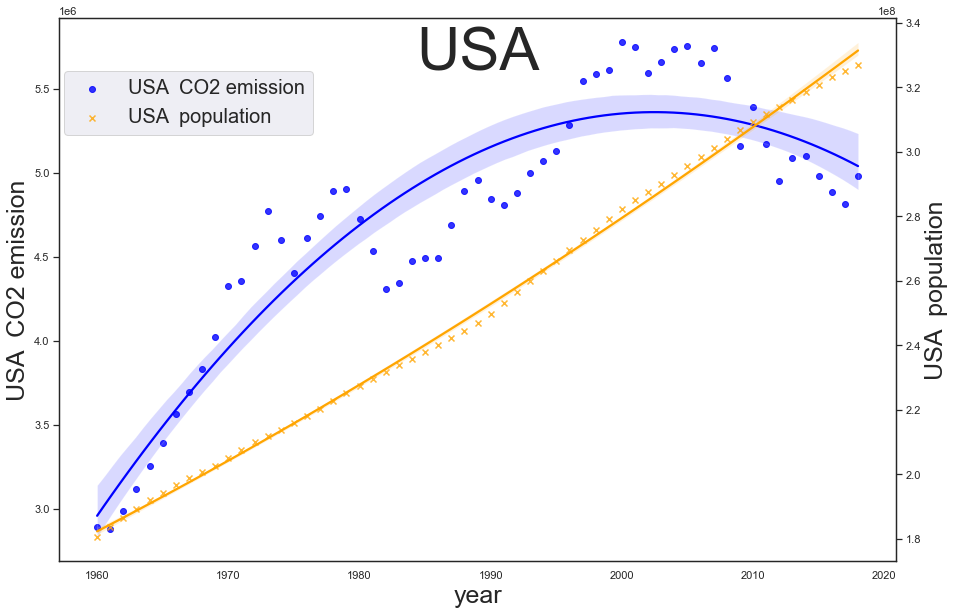

In [17]:
draw_plot(new_us_co2_df, 'USA')

### Japan

In [18]:
df_japan_population = df_polulation.loc[df_polulation['Country Name'] == 'Japan']
df_japan_population = df_japan_population.drop(df_japan_population.columns[[0,1,2,3]], axis=1)
df_japan_population.drop('2021', axis=1, inplace=True)
new_japan_population_df = df_japan_population.T.reset_index()
new_japan_population_df.rename(columns = {'index':'year', 119:'population'}, inplace = True)
new_japan_population_df.drop(new_japan_population_df.tail(1).index,inplace=True)
new_japan_population_df['population'] = new_japan_population_df['population'].astype(float)

In [19]:
df_japan_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_japan_co2 = df_japan_co2.loc[df_japan_co2['Country Name'] == 'Japan']
df_japan_co2 = df_japan_co2.drop(df_japan_co2.columns[[0,1,2,3,64,63]], axis=1)

new_japan_co2_df = df_japan_co2.T.reset_index()
new_japan_co2_df.rename(columns = {'index':'year', 119:'co2'}, inplace = True)
new_japan_co2_df.drop(new_japan_co2_df.tail(1).index,inplace=True)
new_japan_co2_df['co2'] = new_japan_co2_df['co2'].astype(float)

new_japan_co2_df['population'] = new_japan_population_df['population']
new_japan_co2_df['year'] = new_japan_co2_df['year'].astype(float)

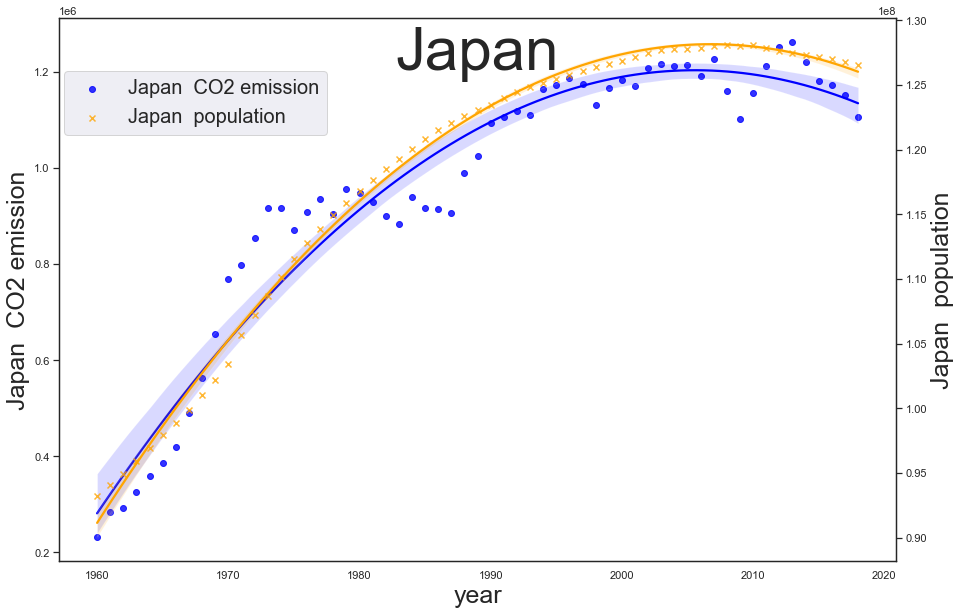

In [20]:
draw_plot(new_japan_co2_df, 'Japan')

### China

In [21]:
df_china_population = df_polulation.loc[df_polulation['Country Name'] == 'China']
df_china_population = df_china_population.drop(df_china_population.columns[[0,1,2,3]], axis=1)
df_china_population.drop('2021', axis=1, inplace=True)
new_china_population_df = df_china_population.T.reset_index()
new_china_population_df
new_china_population_df.rename(columns = {'index':'year', 40:'population'}, inplace = True)
new_china_population_df.drop(new_china_population_df.tail(1).index,inplace=True)
new_china_population_df['population'] = new_china_population_df['population'].astype(float)

In [22]:
df_china_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_china_co2 = df_china_co2.loc[df_china_co2['Country Name'] == 'China']
df_china_co2 = df_china_co2.drop(df_china_co2.columns[[0,1,2,3,64,63]], axis=1)

new_china_co2_df = df_china_co2.T.reset_index()
new_china_co2_df.rename(columns = {'index':'year', 40:'co2'}, inplace = True)
new_china_co2_df.drop(new_china_co2_df.tail(1).index,inplace=True)
new_china_co2_df['co2'] = new_china_co2_df['co2'].astype(float)

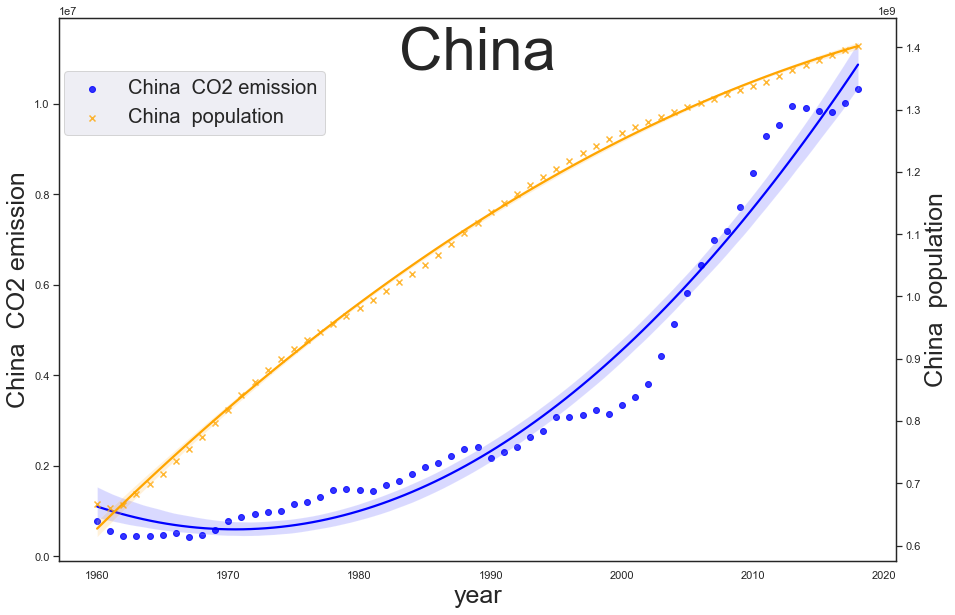

In [23]:
new_china_co2_df['population'] = new_china_population_df['population']
new_china_co2_df['year'] = new_china_co2_df['year'].astype(float)
draw_plot(new_china_co2_df, 'China')

### European Union

In [33]:
df_eu_population = df_polulation.loc[df_polulation['Country Name'] == 'European Union']
df_eu_population = df_eu_population.drop(df_eu_population.columns[[0,1,2,3]], axis=1)
df_eu_population.drop('2021', axis=1, inplace=True)
new_eu_population_df = df_eu_population.T.reset_index()
new_eu_population_df.rename(columns = {'index':'year', 73:'population'}, inplace = True)
new_eu_population_df.drop(new_eu_population_df.tail(1).index,inplace=True)
new_eu_population_df['population'] = new_eu_population_df['population'].astype(float)

In [34]:
df_eu_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_eu_co2 = df_eu_co2.loc[df_eu_co2['Country Name'] == 'European Union']
df_eu_co2 = df_eu_co2.drop(df_eu_co2.columns[[0,1,2,3,64,63]], axis=1)

new_eu_co2_df = df_eu_co2.T.reset_index()
new_eu_co2_df.rename(columns = {'index':'year', 73:'co2'}, inplace = True)
new_eu_co2_df.drop(new_eu_co2_df.tail(1).index,inplace=True)
new_eu_co2_df['co2'] = new_eu_co2_df['co2'].astype(float)

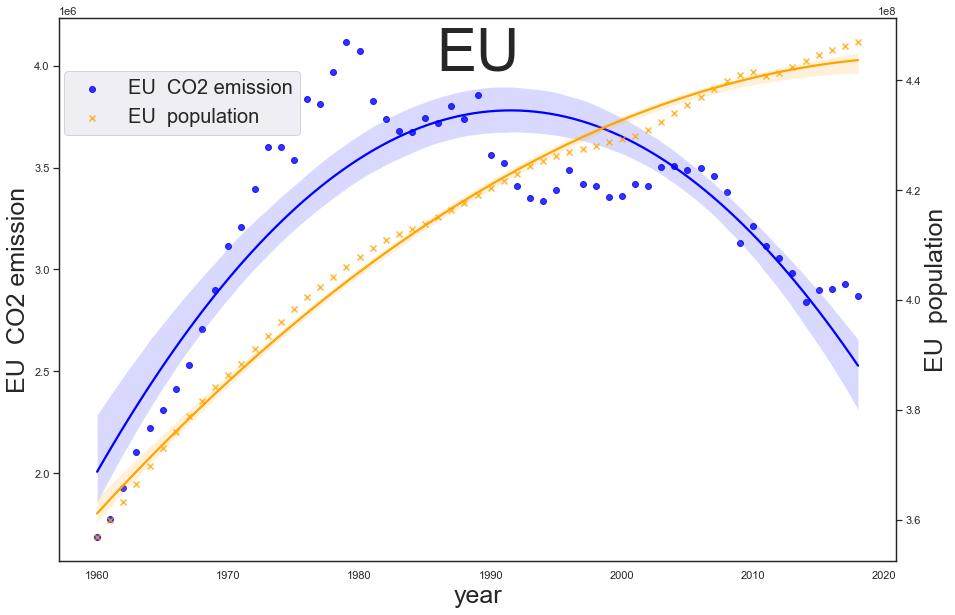

In [35]:
new_eu_co2_df['population'] = new_eu_population_df['population']
new_eu_co2_df['year'] = new_eu_co2_df['year'].astype(float)
draw_plot(new_eu_co2_df, 'EU')

### India

In [36]:
df_india_population = df_polulation.loc[df_polulation['Country Name'] == 'India']
df_india_population = df_india_population.drop(df_india_population.columns[[0,1,2,3]], axis=1)
df_india_population.drop('2021', axis=1, inplace=True)
new_india_population_df = df_india_population.T.reset_index()
new_india_population_df.rename(columns = {'index':'year', 109:'population'}, inplace = True)
new_india_population_df.drop(new_india_population_df.tail(1).index,inplace=True)
new_india_population_df['population'] = new_india_population_df['population'].astype(float)

In [37]:
df_india_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_india_co2 = df_india_co2.loc[df_india_co2['Country Name'] == 'India']
df_india_co2 = df_india_co2.drop(df_india_co2.columns[[0,1,2,3,64,63]], axis=1)

new_india_co2_df = df_india_co2.T.reset_index()
new_india_co2_df.rename(columns = {'index':'year', 109:'co2'}, inplace = True)
new_india_co2_df.drop(new_india_co2_df.tail(1).index,inplace=True)
new_india_co2_df['co2'] = new_india_co2_df['co2'].astype(float)

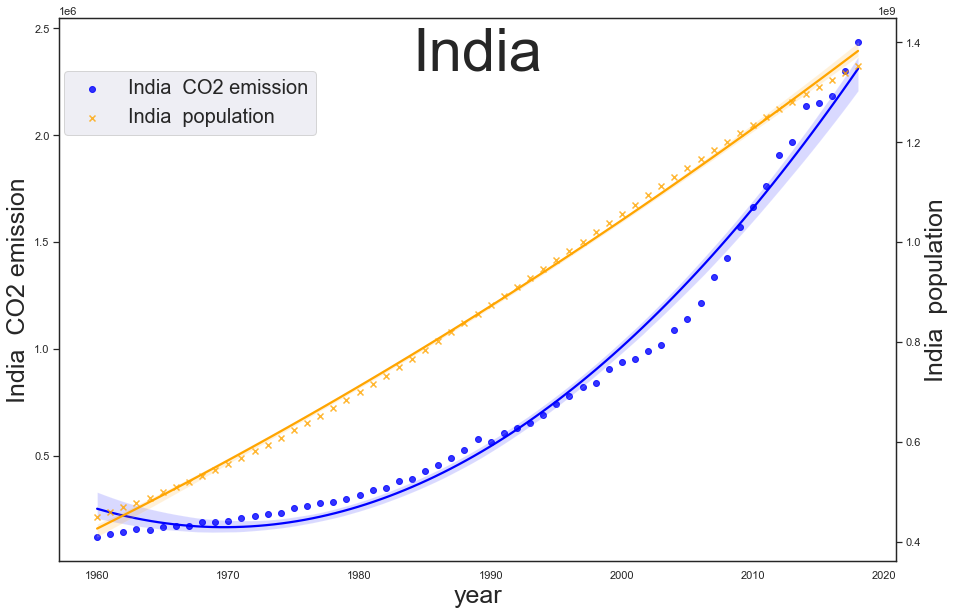

In [38]:
new_india_co2_df['population'] = new_india_population_df['population']
new_india_co2_df['year'] = new_india_co2_df['year'].astype(float)
draw_plot(new_india_co2_df, 'India')

### Brazil

In [39]:
df_brazil_population = df_polulation.loc[df_polulation['Country Name'] == 'Brazil']
df_brazil_population = df_brazil_population.drop(df_brazil_population.columns[[0,1,2,3]], axis=1)
df_brazil_population.drop('2021', axis=1, inplace=True)
new_brazil_population_df = df_brazil_population.T.reset_index()
new_brazil_population_df.rename(columns = {'index':'year', 29:'population'}, inplace = True)
new_brazil_population_df.drop(new_brazil_population_df.tail(1).index,inplace=True)
new_brazil_population_df['population'] = new_brazil_population_df['population'].astype(float)

In [40]:
df_brazil_co2 = pd.DataFrame(co2_emission_dataset_list, columns = co2_emission_dataset[4])
df_brazil_co2 = df_brazil_co2.loc[df_brazil_co2['Country Name'] == 'Brazil']
df_brazil_co2 = df_brazil_co2.drop(df_brazil_co2.columns[[0,1,2,3,64,63]], axis=1)

new_brazil_co2_df = df_brazil_co2.T.reset_index()
new_brazil_co2_df.rename(columns = {'index':'year', 29:'co2'}, inplace = True)
new_brazil_co2_df.drop(new_brazil_co2_df.tail(1).index,inplace=True)
new_brazil_co2_df['co2'] = new_brazil_co2_df['co2'].astype(float)

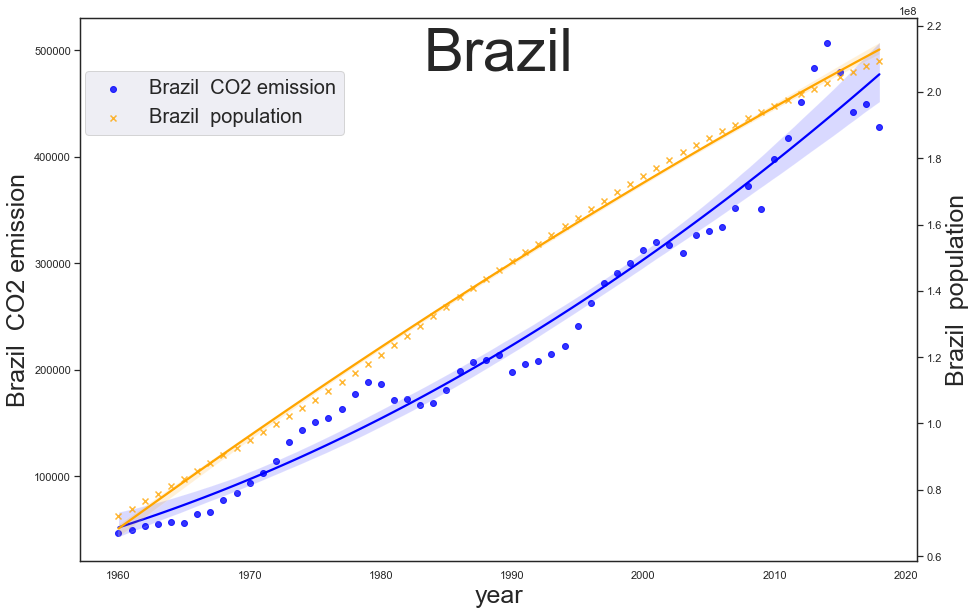

In [41]:
new_brazil_co2_df['population'] = new_brazil_population_df['population']
new_brazil_co2_df['year'] = new_brazil_co2_df['year'].astype(float)
draw_plot(new_brazil_co2_df, 'Brazil')